In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pathlib 
import sys
from tqdm import tqdm

sys.path.append("..")
from utils.utils import show_mask_image

from  utils.sample_patches_main import sample_patches, sample_hard_negatives, sample_blob_negatives


In [3]:
annotations = pd.read_json('../resources/ddsm/ddsm_annotations_16bits_1152_896.json.gz', orient='records', lines=True, compression='gzip')
print(len(annotations)) # coincide con el número de máscaras
split_csv = '../resources/ddsm/DDSM_test.csv'
split_csv = '../resources/ddsm/ddsm_nikulin_partitions/test_filenames.txt'

print("Num images in test split: ", len(pd.read_csv(split_csv)))
test_images = pd.read_csv(split_csv)
print("num test images: ", len(test_images))

#test_images = test_images.ddsm_image.values


4664
Num images in test split:  986
num test images:  986


In [22]:
print(annotations)

               type  assessment  subtlety  pathology  \
0              MASS           3         3  MALIGNANT   
1              MASS           3         3  MALIGNANT   
2     CALCIFICATION           0         4  MALIGNANT   
3     CALCIFICATION           3         2  MALIGNANT   
4              MASS           4         4  MALIGNANT   
...             ...         ...       ...        ...   
4659  CALCIFICATION           4         4     BENIGN   
4660           MASS           4         2     BENIGN   
4661           MASS           4         2     BENIGN   
4662           MASS           5         5     BENIGN   
4663           MASS           5         5     BENIGN   

                                                outline  \
0     [[793.3386273398, 793.3386273398, 793.08451503...   
1     [[811.917888563, 811.917888563, 811.6790189283...   
2     [[903.2367491166, 903.2367491166, 902.78445229...   
3     [[886.8149666838, 886.8149666838, 886.35571501...   
4     [[265.463572585, 265.46357

In this sample the boundary is beyond the image limits

max points:  [903.23674912 544.16559718]


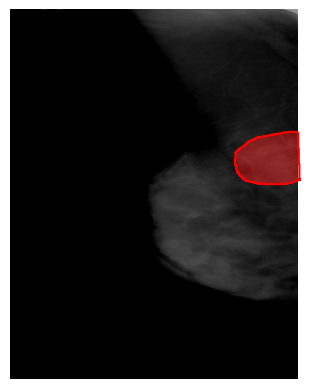

In [4]:
annotation = annotations.iloc[2]
ddsm_root_dir = pathlib.Path('/home/alalbiol/Data/mamo/DDSM_png_1152x896')

image_id = annotation['image_id']
image_path = ddsm_root_dir / image_id
img = np.array(Image.open(str(image_path)))

mask_id = annotation['mask_id']
roi_mask_path = ddsm_root_dir / mask_id
roi_mask = np.array(Image.open(str(roi_mask_path)))

points = np.array(annotation['outline']).T

show_mask_image(img, roi_mask)
plt.plot(points[:,0], points[:,1], 'r-')

print("max points: ", np.max(points, axis=0))
# hay anotaciones que se salen de la imagen hay que tener cuidado con eso




In [ ]:
    


def extract_patches_from_anot(annotation, test_images, out_dir,  ddsm_root_dir, nb_abn = 2, nb_bkg = 1, 
                            patch_size=512, verbose=False, standarize_img=True):
    ddsm_root_dir = pathlib.Path(ddsm_root_dir)
    
    image_id = annotation['image_id']
    
    
    
    
    if image_id not in test_images:
        return
    
   
    image_path = ddsm_root_dir / image_id
    img = np.array(Image.open(str(image_path)))
    
    mask_id = annotation['mask_id']
    roi_mask_path = ddsm_root_dir / mask_id
    roi_mask = np.array(Image.open(str(roi_mask_path)))
    
    points = np.array(annotation['outline']).T
    
    xmin, ymin = points.min(axis=0)
    xmax, ymax = points.max(axis=0)
    xmin = max(xmin, 0)
    ymin = max(ymin, 0)
    xmax = min(xmax, img.shape[1]-1)
    ymax = min(ymax, img.shape[0]-1)
    
    width = xmax - xmin
    height = ymax - ymin
    bounding_box = (xmin, ymin, width, height)
    
    assert xmin >= 0, image_id
    assert ymin >= 0 , image_id
    assert xmax < img.shape[1], f"{xmax} < {img.shape[1]}"
    assert ymax < img.shape[0]
    assert width > 0, f"{image_id} {width} {xmin} {xmax}"
    assert height > 0, image_id
    

    
    sample_patches(img, roi_mask, out_dir, mask_id, bounding_box, patch_size=patch_size,
                pos_cutoff=.9, neg_cutoff=.1,
                nb_bkg=nb_bkg, nb_abn=nb_abn,
                verbose=verbose, standarize_img=standarize_img)
    



Extract patches from one annotation

In [24]:


root_ddsm = '/home/alalbiol/Data/mamo/DDSM_png_16bit_1152x896'

patch_size = 512
out_dir = pathlib.Path(f'/tmp/ex_patches/')
out_dir.mkdir(exist_ok=True)

test_images =  annotations.image_id.unique() # all images here
nrow = 4
ncol = 4
num_images = nrow * ncol


extract_patches_from_anot(annotations.iloc[2], test_images, out_dir, root_ddsm, 
                            patch_size=patch_size,
                            nb_abn=8, nb_bkg=8,
                            verbose=True
                            )



image_id:  cancers/cancer_13/case4161/D_4161_1.RIGHT_MLO.png
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0000_mask.png: sampled abn at (721, 494)
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0001_mask.png: sampled abn at (838, 511)
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0002_mask.png: sampled abn at (868, 466)
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0003_mask.png: sampled abn at (789, 532)
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0004_mask.png: sampled abn at (863, 493)
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0005_mask.png: sampled abn at (855, 522)
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0006_mask.png: sampled abn at (768, 414)
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0007_mask.png: sampled abn at (891, 470)
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0000_mask.png: sampled a bkg at= (612, 1090)
D_4161_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0001_mask.png: sampled a bkg at= (397, 475)
D_4161_1.RIGHT_MLO_CAL

Num images:  16
Num images:  16 16


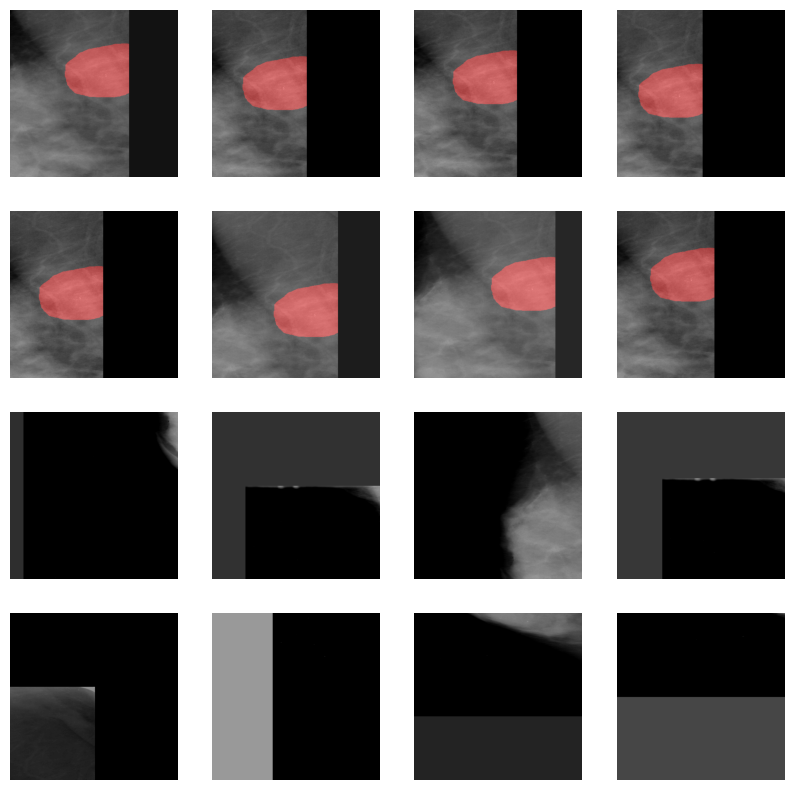

In [25]:


images = list(out_dir.rglob('*img.npy'))

print ("Num images: ", len(images))
#sample 16 images

#images = np.random.choice(images, num_images)
masks = [str(img).replace('_img.npy', '_mask.png') for img in images]
print("Num images: ", len(images), len(masks))

fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10, 10))
ax = ax.ravel()




for i in range(num_images):
    
    
    
    #img = np.array(Image.open(images[i]))
    img = np.load(images[i])
    
    assert img.shape[0] == img.shape[1] and img.shape[0] == patch_size, f"{img.shape}"
    mask = np.array(Image.open(masks[i]))
    show_mask_image(img, mask, ax[i])


Not extract patches from all the dataset with several sizes

In [8]:
# let's clean the directory
!rm /tmp/eval_patches_* -rf 

In [29]:

test_images = pd.read_csv(split_csv)
test_images = test_images.ddsm_image.values
print("num test images: ", len(test_images))

root_ddsm = '/home/alalbiol/Data/mamo/DDSM_png_16bit_1152x896'

patch_sizes = [224]
for patch_size in patch_sizes:
    print(f"Extractig patches of size {patch_size}")
    out_dir = pathlib.Path(f'/tmp/eval_patches_16bits_{patch_size}_test_nikulin/')
    out_dir.mkdir(exist_ok=True)

    for k in tqdm(range(len(annotations))):
        extract_patches_from_anot(annotations.iloc[k], test_images, out_dir, root_ddsm, 
                                patch_size=patch_size)
    

 

num test images:  986
Extractig patches of size 224


  0%|          | 0/4664 [00:00<?, ?it/s]

Extracting patch from image:  cancers/cancer_13/case4102/D_4102_1.RIGHT_MLO.png


  0%|          | 15/4664 [00:00<01:05, 71.22it/s]

Extracting patch from image:  cancers/cancer_13/case4102/D_4102_1.RIGHT_CC.png


  2%|▏         | 87/4664 [00:00<00:21, 210.34it/s]

Extracting patch from image:  cancers/cancer_03/case1048/A_1048_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_03/case1048/A_1048_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_03/case1061/A_1061_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_03/case1061/A_1061_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_03/case1032/A_1032_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_03/case1032/A_1032_1.LEFT_MLO.png


  3%|▎         | 117/4664 [00:00<00:25, 181.04it/s]

Extracting patch from image:  cancers/cancer_03/case1021/A_1021_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_03/case1021/A_1021_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_03/case1055/A_1055_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_03/case1055/A_1055_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_02/case0064/C_0064_1.LEFT_MLO.png


  4%|▍         | 184/4664 [00:00<00:17, 261.14it/s]

Extracting patch from image:  cancers/cancer_02/case0064/C_0064_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_02/case0064/C_0064_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_02/case0064/C_0064_1.RIGHT_CC.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Extracting patch from image:  cancers/cancer_02/case0133/C_0133_1.LEFT_MLO.png


  5%|▍         | 215/4664 [00:07<04:13, 17.55it/s] 

Extracting patch from image:  cancers/cancer_02/case0133/C_0133_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_02/case0041/C_0041_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_02/case0041/C_0041_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_02/case0022/C_0022_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_02/case0022/C_0022_1.RIGHT_MLO.png


  5%|▌         | 236/4664 [00:07<03:29, 21.17it/s]

Extracting patch from image:  cancers/cancer_02/case0022/C_0022_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_02/case0022/C_0022_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_02/case0098/C_0098_1.RIGHT_MLO.png


  6%|▌         | 273/4664 [00:08<02:55, 24.97it/s]

Extracting patch from image:  cancers/cancer_02/case0098/C_0098_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_02/case0100/C_0100_1.RIGHT_MLO.png


  7%|▋         | 343/4664 [00:08<01:32, 46.84it/s]

Extracting patch from image:  cancers/cancer_02/case0100/C_0100_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_02/case0134/C_0134_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_02/case0057/C_0057_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_02/case0057/C_0057_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_02/case0068/C_0068_1.RIGHT_CC.png


  8%|▊         | 362/4664 [00:09<01:22, 52.28it/s]

Extracting patch from image:  cancers/cancer_02/case0068/C_0068_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_02/case0068/C_0068_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_02/case0068/C_0068_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_02/case0102/C_0102_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_02/case0102/C_0102_1.RIGHT_MLO.png


  9%|▉         | 412/4664 [00:09<00:51, 82.84it/s]

Extracting patch from image:  cancers/cancer_12/case4158/D_4158_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_12/case4158/D_4158_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_12/case4108/D_4108_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_12/case4108/D_4108_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_12/case4142/D_4142_1.RIGHT_CC.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7999999999999999
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7499999999999999


 10%|█         | 481/4664 [00:22<06:29, 10.73it/s]

Extracting patch from image:  cancers/cancer_12/case4142/D_4142_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_12/case4021/D_4021_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_12/case4021/D_4021_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_12/case4125/D_4125_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_12/case4125/D_4125_1.RIGHT_CC.png


 11%|█         | 506/4664 [00:23<04:58, 13.93it/s]

Extracting patch from image:  cancers/cancer_12/case4123/D_4123_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_12/case4123/D_4123_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_12/case4160/D_4160_1.LEFT_MLO.png


 11%|█▏        | 528/4664 [00:23<03:59, 17.30it/s]

Extracting patch from image:  cancers/cancer_12/case4160/D_4160_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_14/case1928/A_1928_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_14/case2000/A_2000_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_14/case2000/A_2000_1.RIGHT_MLO.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7999999999999999


 11%|█▏        | 528/4664 [00:36<03:59, 17.30it/s]

Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7499999999999999


 13%|█▎        | 609/4664 [00:36<07:54,  8.54it/s]

Extracting patch from image:  cancers/cancer_14/case1985/A_1985_1.RIGHT_MLO.png


 14%|█▍        | 642/4664 [00:36<05:58, 11.21it/s]

Extracting patch from image:  cancers/cancer_14/case1985/A_1985_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_09/case3137/B_3137_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_09/case0341/C_0341_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_09/case0341/C_0341_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_09/case3024/B_3024_1.RIGHT_CC.png


 14%|█▍        | 669/4664 [00:36<04:40, 14.23it/s]

Extracting patch from image:  cancers/cancer_09/case3024/B_3024_1.RIGHT_MLO.png


 15%|█▍        | 692/4664 [00:36<03:43, 17.77it/s]

Extracting patch from image:  cancers/cancer_09/case3389/B_3389_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_09/case3389/B_3389_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_09/case0231/C_0231_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_09/case0231/C_0231_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_09/case3380/B_3380_1.RIGHT_MLO.png


 16%|█▌        | 756/4664 [00:37<02:02, 32.00it/s]

Extracting patch from image:  cancers/cancer_09/case3380/B_3380_1.RIGHT_CC.png


 17%|█▋        | 812/4664 [00:37<01:20, 47.86it/s]

Extracting patch from image:  cancers/cancer_09/case0186/C_0186_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_09/case0186/C_0186_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_09/case3061/B_3061_1.RIGHT_CC.png


 19%|█▉        | 875/4664 [00:37<00:56, 67.16it/s]

Extracting patch from image:  cancers/cancer_09/case3061/B_3061_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_07/case1249/A_1249_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_07/case1249/A_1249_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_06/case1158/A_1158_1.RIGHT_MLO.png


 22%|██▏       | 1020/4664 [00:37<00:22, 162.11it/s]

Extracting patch from image:  cancers/cancer_06/case1161/A_1161_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_06/case1201/A_1201_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_06/case1201/A_1201_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_06/case1211/A_1211_1.LEFT_MLO.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Extracting patch from image:  cancers/cancer_06/case1211/A_1211_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_06/case1162/A_1162_1.RIGHT_MLO.png


 26%|██▋       | 1231/4664 [00:42<00:48, 70.06it/s] 

Extracting patch from image:  cancers/cancer_06/case1162/A_1162_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_01/case3038/B_3038_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_01/case3038/B_3038_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_01/case3042/B_3042_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_01/case3042/B_3042_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_08/case1533/A_1533_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_08/case1533/A_1533_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_08/case1538/A_1538_1.LEFT_CC.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7999999999999999


 28%|██▊       | 1302/4664 [00:51<02:20, 23.92it/s]

Extracting patch from image:  cancers/cancer_08/case1538/A_1538_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_08/case1404/A_1404_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_08/case1404/A_1404_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_08/case1467/A_1467_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_08/case1467/A_1467_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_08/case1230/A_1230_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_08/case1505/A_1505_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_08/case1505/A_1505_1.LEFT_CC.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Extracting patch from image:  cancers/cancer_08/case1216/A_1216_1.LEFT_MLO.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Extracting patch from image:  cancers/cancer_08/case1216/A_1216_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_08/case1537/A_1537_1.LEFT_CC.pn

 28%|██▊       | 1302/4664 [01:06<02:20, 23.92it/s]

Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85


 29%|██▊       | 1339/4664 [01:08<05:47,  9.58it/s]

Extracting patch from image:  cancers/cancer_08/case1537/A_1537_1.LEFT_MLO.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85


 29%|██▊       | 1340/4664 [01:12<07:11,  7.70it/s]

Extracting patch from image:  cancers/cancer_15/case0107/C_0107_1.RIGHT_MLO.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85


 30%|███       | 1400/4664 [01:19<06:47,  8.01it/s]

Extracting patch from image:  cancers/cancer_15/case0107/C_0107_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_15/case3512/B_3512_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_15/case3512/B_3512_1.LEFT_CC.png


 31%|███       | 1425/4664 [01:19<05:39,  9.55it/s]

Extracting patch from image:  cancers/cancer_15/case0106/C_0106_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_15/case0106/C_0106_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_15/case3514/B_3514_1.LEFT_CC.png


 32%|███▏      | 1485/4664 [01:19<03:33, 14.88it/s]

Extracting patch from image:  cancers/cancer_15/case3514/B_3514_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_15/case0458/C_0458_1.LEFT_MLO.png


 33%|███▎      | 1557/4664 [01:20<02:13, 23.29it/s]

Extracting patch from image:  cancers/cancer_15/case0458/C_0458_1.LEFT_CC.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85


 34%|███▍      | 1608/4664 [01:25<02:48, 18.11it/s]

Extracting patch from image:  cancers/cancer_15/case3477/B_3477_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_15/case3477/B_3477_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_10/case1622/A_1622_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_10/case1622/A_1622_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_10/case1623/A_1623_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_10/case1623/A_1623_1.RIGHT_MLO.png


 35%|███▍      | 1631/4664 [01:25<02:17, 22.10it/s]

Extracting patch from image:  cancers/cancer_10/case1619/A_1619_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_10/case1619/A_1619_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_10/case1638/A_1638_1.LEFT_CC.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7999999999999999


 35%|███▍      | 1631/4664 [01:36<02:17, 22.10it/s]

Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7499999999999999
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.6999999999999998


 35%|███▌      | 1651/4664 [01:42<10:31,  4.77it/s]

Extracting patch from image:  cancers/cancer_10/case1638/A_1638_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_10/case1573/A_1573_1.RIGHT_CC.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85


 36%|███▌      | 1660/4664 [01:47<12:09,  4.12it/s]

Extracting patch from image:  cancers/cancer_10/case1573/A_1573_1.RIGHT_MLO.png


 36%|███▌      | 1674/4664 [01:47<09:57,  5.01it/s]

Extracting patch from image:  cancers/cancer_10/case1597/A_1597_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_10/case1597/A_1597_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_10/case1666/A_1666_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_10/case1666/A_1666_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_10/case1666/A_1666_1.LEFT_CC.png


 37%|███▋      | 1733/4664 [01:47<03:52, 12.63it/s]

Extracting patch from image:  cancers/cancer_10/case1666/A_1666_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_11/case1701/A_1701_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_11/case1701/A_1701_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_11/case1772/A_1772_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_11/case1772/A_1772_1.LEFT_MLO.png


 38%|███▊      | 1752/4664 [01:48<03:01, 16.03it/s]

Extracting patch from image:  cancers/cancer_11/case1790/A_1790_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_11/case1790/A_1790_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_11/case1730/A_1730_1.LEFT_MLO.png


 39%|███▊      | 1800/4664 [01:48<01:41, 28.10it/s]

Extracting patch from image:  cancers/cancer_11/case1730/A_1730_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_11/case1671/A_1671_1.RIGHT_CC.png


 40%|███▉      | 1855/4664 [01:48<01:03, 44.31it/s]

Extracting patch from image:  cancers/cancer_11/case1671/A_1671_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_04/case1096/A_1096_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_04/case1096/A_1096_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_04/case1097/A_1097_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_04/case1097/A_1097_1.LEFT_MLO.png


 41%|████▏     | 1924/4664 [01:48<00:32, 83.61it/s]

Extracting patch from image:  cancers/cancer_04/case1071/A_1071_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_04/case1071/A_1071_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_05/case0171/C_0171_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_05/case0171/C_0171_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0150/C_0150_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_05/case0150/C_0150_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_05/case0150/C_0150_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0150/C_0150_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0193/C_0193_1.RIGHT_MLO.png


 42%|████▏     | 1949/4664 [01:49<00:43, 62.95it/s]

Extracting patch from image:  cancers/cancer_05/case0168/C_0168_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0168/C_0168_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_05/case0175/C_0175_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0175/C_0175_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_05/case0214/C_0214_1.RIGHT_MLO.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7999999999999999


 43%|████▎     | 1989/4664 [01:58<04:02, 11.02it/s]

Extracting patch from image:  cancers/cancer_05/case0214/C_0214_1.RIGHT_CC.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7999999999999999
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7499999999999999


 44%|████▍     | 2054/4664 [02:11<05:23,  8.06it/s]

Extracting patch from image:  cancers/cancer_05/case0221/C_0221_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0199/C_0199_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_05/case0199/C_0199_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0191/C_0191_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0191/C_0191_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0191/C_0191_1.LEFT_CC.png


 45%|████▍     | 2076/4664 [02:12<04:23,  9.84it/s]

Extracting patch from image:  cancers/cancer_05/case0191/C_0191_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_05/case0145/C_0145_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0145/C_0145_1.LEFT_CC.png


 45%|████▍     | 2093/4664 [02:12<03:38, 11.79it/s]

Extracting patch from image:  cancers/cancer_05/case0140/C_0140_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_05/case0140/C_0140_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0151/C_0151_1.RIGHT_CC.png
Extracting patch from image:  cancers/cancer_05/case0151/C_0151_1.RIGHT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0146/C_0146_1.LEFT_MLO.png
Extracting patch from image:  cancers/cancer_05/case0146/C_0146_1.LEFT_MLO.png


 45%|████▌     | 2107/4664 [02:12<03:05, 13.78it/s]

Extracting patch from image:  cancers/cancer_05/case0146/C_0146_1.LEFT_MLO.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Extracting patch from image:  cancers/cancer_05/case0146/C_0146_1.LEFT_CC.png
Extracting patch from image:  cancers/cancer_05/case0146/C_0146_1.LEFT_CC.png
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85


 70%|███████   | 3275/4664 [02:24<00:10, 133.87it/s]

Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7999999999999999


 74%|███████▎  | 3429/4664 [02:33<00:28, 44.03it/s] 

Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7999999999999999


 74%|███████▎  | 3429/4664 [02:46<00:28, 44.03it/s]

Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7499999999999999


 77%|███████▋  | 3605/4664 [02:47<00:19, 55.18it/s]

Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85


 89%|████████▊ | 4136/4664 [02:54<00:03, 173.91it/s]

Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85


 90%|█████████ | 4199/4664 [02:59<00:15, 30.57it/s] 

Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.85
Nb of trials reached maximum, decrease overlap cutoff by 0.05: 0.7999999999999999


100%|██████████| 4664/4664 [03:10<00:00, 24.44it/s] 


Num images:  16 16


Text(0.5, 0.98, 'Patch size 224')

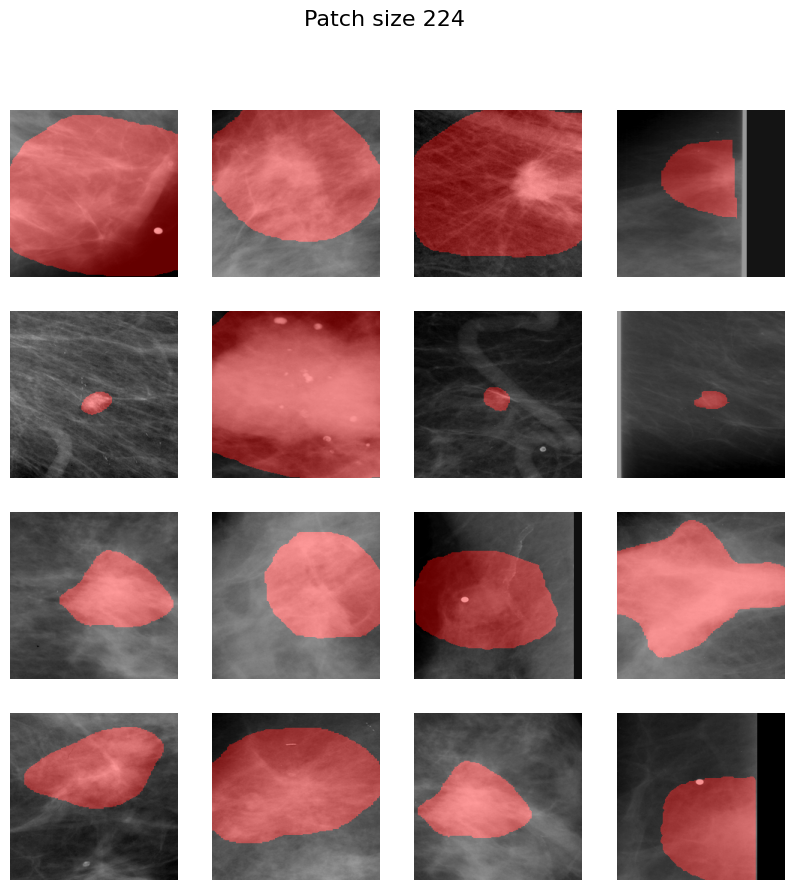

In [30]:
patch_size = 224
mass_malignat = pathlib.Path(f'/tmp/eval_patches_16bits_{patch_size}_test_nikulin/malignant_mass/')

images = list(mass_malignat.glob('*img.npy'))

#sample 16 images
nrow = 4
ncol = 4
num_images = nrow * ncol

images = np.random.choice(images, num_images)
masks = [str(img).replace('_img.png', '_mask.png') for img in images]
masks = [str(img).replace('_img.npy', '_mask.png') for img in images]

print("Num images: ", len(images), len(masks))

fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10, 10))
ax = ax.ravel()




for i in range(num_images):
    if images[i].suffix == '.npy':
        img = np.load(images[i])
    else:
        img = np.array(Image.open(images[i]))
    assert img.shape[0] == img.shape[1] and img.shape[0] == patch_size, f"{img.shape}"
    mask = np.array(Image.open(masks[i]))
    show_mask_image(img, mask, ax[i])

# set figure title
fig.suptitle(f"Patch size {patch_size}", fontsize=16)



Number of images:  373 /tmp/eval_patches_16bits_224_test_nikulin/background
Num images:  16 16


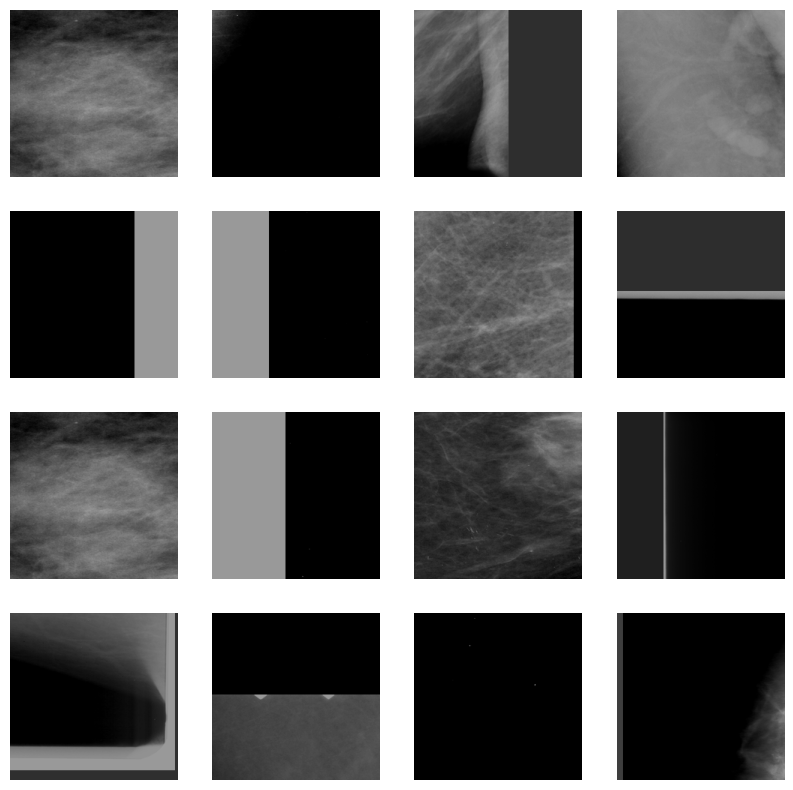

In [31]:
patch_size = 224
background = pathlib.Path(f'/tmp/eval_patches_16bits_{patch_size}_test_nikulin/background')

images = list(background.glob('*img.npy'))

print("Number of images: ", len(images), background)

#sample 16 images
nrow = 4
ncol = 4
num_images = nrow * ncol

images = np.random.choice(images, num_images)
masks = [str(img).replace('_img.npy', '_mask.png') for img in images]
print("Num images: ", len(images), len(masks))

fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10, 10))
ax = ax.ravel()



for i in range(num_images):
    #img = np.array(Image.open(images[i]))
    img = np.load(images[i])
    mask = np.array(Image.open(masks[i]))
    mask = None
    show_mask_image(img, mask, ax[i])


# Hard negatives

In [32]:



def extract_hard_negatives_from_anot(annotation,test_images, out_dir, ddsm_root_dir,  neg_cutoff=0.2, nb_bkg=2, 
                                    patch_size=256):
    ddsm_root_dir = pathlib.Path(ddsm_root_dir)
    
    image_id = annotation['image_id']
    
    if image_id not in test_images:
        return

    
    image_path = ddsm_root_dir / image_id
    img = np.array(Image.open(str(image_path)))
    
    mask_id = annotation['mask_id']
    roi_mask_path = ddsm_root_dir / mask_id
    roi_mask = np.array(Image.open(str(roi_mask_path)))
    
    
    points = np.array(annotation['outline']).T
    
    xmin, ymin = points.min(axis=0)
    xmax, ymax = points.max(axis=0)
    xmin = max(xmin, 0)
    ymin = max(ymin, 0)
    xmax = min(xmax, img.shape[1]-1)
    ymax = min(ymax, img.shape[0]-1)
    
    width = xmax - xmin
    height = ymax - ymin
    bounding_box = (xmin, ymin, width, height)
    
    sample_hard_negatives(img, roi_mask, out_dir, mask_id, bounding_box, patch_size=patch_size,
                neg_cutoff=neg_cutoff,
                nb_bkg=nb_bkg, 
                verbose=False)


In [15]:
!rm /tmp/eval_patches_hardneg_* -rf
root_ddsm = pathlib.Path('/home/alalbiol/Data/mamo/DDSM_png_16bit_1152x896')


test_images = pd.read_csv(split_csv)
test_images = test_images.ddsm_image.values
print("num test images: ", len(test_images))


patch_sizes = [224]

for patch_size in patch_sizes:
    print(f"Extractig patches of size {patch_size}")
    out_dir = pathlib.Path(f'/tmp/eval_patches_hardneg_{patch_size}_test_nikulin/')

    out_dir.mkdir(exist_ok=True)


    for k in tqdm(range(len(annotations))):
        extract_hard_negatives_from_anot(annotations.iloc[k],test_images, out_dir, 
                                        ddsm_root_dir, patch_size=patch_size, neg_cutoff=0.2, nb_bkg=2)
        

num test images:  986
Extractig patches of size 224


100%|██████████| 4664/4664 [00:21<00:00, 220.07it/s] 


Num images:  746
Num images:  16 16


Text(0.5, 0.98, 'Hard negatives Patch size 224')

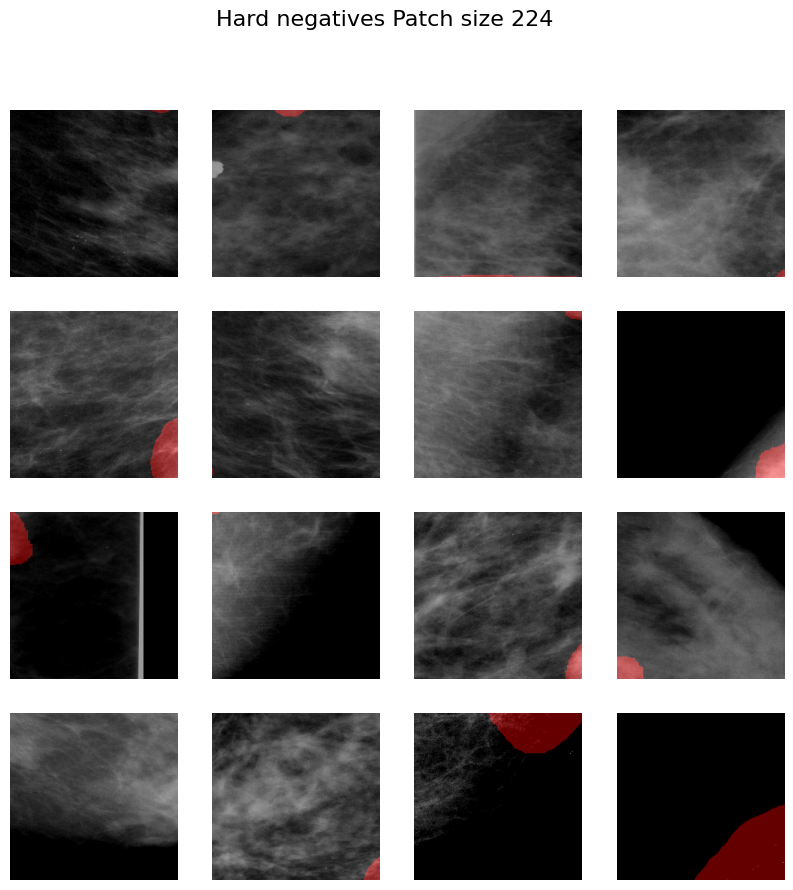

In [33]:
patch_size = 224
background = pathlib.Path(f'/tmp/eval_patches_hardneg_{patch_size}_test_nikulin/background/')

images = list(background.glob('*img.png'))

print("Num images: ", len(images))

#sample 16 images
nrow = 4
ncol = 4
num_images = nrow * ncol

images = np.random.choice(images, num_images)
masks = [str(img).replace('_img.png', '_mask.png') for img in images]
print("Num images: ", len(images), len(masks))

fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10, 10))
ax = ax.ravel()



for i in range(num_images):
    img = np.array(Image.open(images[i]))
    mask = np.array(Image.open(masks[i]))
    assert img.shape[0] == img.shape[1] and img.shape[0] == patch_size, f"{img.shape}"
    show_mask_image(img, mask, ax[i])

fig.suptitle(f"Hard negatives Patch size {patch_size}", fontsize=16)


# Test patch extractor at blobs



In [ ]:

import cv2

def extract_negatives_from_blobs(image_path, out_dir, neg_cutoff=0.2, nb_bkg=50, patch_size=256):
        
    img = np.array(Image.open(str(image_path)))
    
    roi_mask = np.zeros_like(img, dtype=np.uint8) 
    
    
    
    img_id = image_path.name
    
    blob_min_area=3 
    blob_min_int=.5
    blob_max_int=.85
    blob_th_step=10
    
    roi_size = (256, 256)
    
        # Build a blob detector.
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = blob_min_area
    params.maxArea = roi_size[0]*roi_size[1]
    params.filterByCircularity = False
    params.filterByColor = False
    params.filterByConvexity = False
    params.filterByInertia = False
    # blob detection only works with "uint8" images.
    params.minThreshold = int(blob_min_int*255)
    params.maxThreshold = int(blob_max_int*255)
    params.thresholdStep = blob_th_step
    # import pdb; pdb.set_trace()
    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3:
        blob_detector = cv2.SimpleBlobDetector(params)
    else:
        blob_detector = cv2.SimpleBlobDetector_create(params)


    
    sample_blob_    negatives(img, roi_mask, out_dir, img_id, 
                blob_detector, patch_size=patch_size,
                neg_cutoff=neg_cutoff,
                nb_bkg=nb_bkg, 
                verbose=False)



In [54]:

!rm /tmp/eval_patches_blobneg_* -rf

ddsm_root_dir = pathlib.Path('/home/alalbiol/Data/mamo/DDSM_png_1152x896/normals')
normal_imgs = list(ddsm_root_dir.rglob('*.png'))
print("Number of normal images: ", len(normal_imgs))

for patch_size in [512, 256, 224]:
    print(f"Extractig patches of size {patch_size}")
    out_dir = pathlib.Path(f'/tmp/eval_patches_blobneg_{patch_size}')

    out_dir.mkdir(exist_ok=True)

    for image_path in tqdm(normal_imgs):
        extract_negatives_from_blobs(image_path, out_dir, neg_cutoff=0.2, nb_bkg=10, patch_size=patch_size)



Number of normal images:  2780
Extractig patches of size 512


100%|██████████| 2780/2780 [19:46<00:00,  2.34it/s]


Extractig patches of size 256


100%|██████████| 2780/2780 [08:06<00:00,  5.72it/s]


Extractig patches of size 224


100%|██████████| 2780/2780 [06:52<00:00,  6.74it/s]


Num images:  27383
Num images:  16 16


Text(0.5, 0.98, 'Negative blob  Patch size 256')

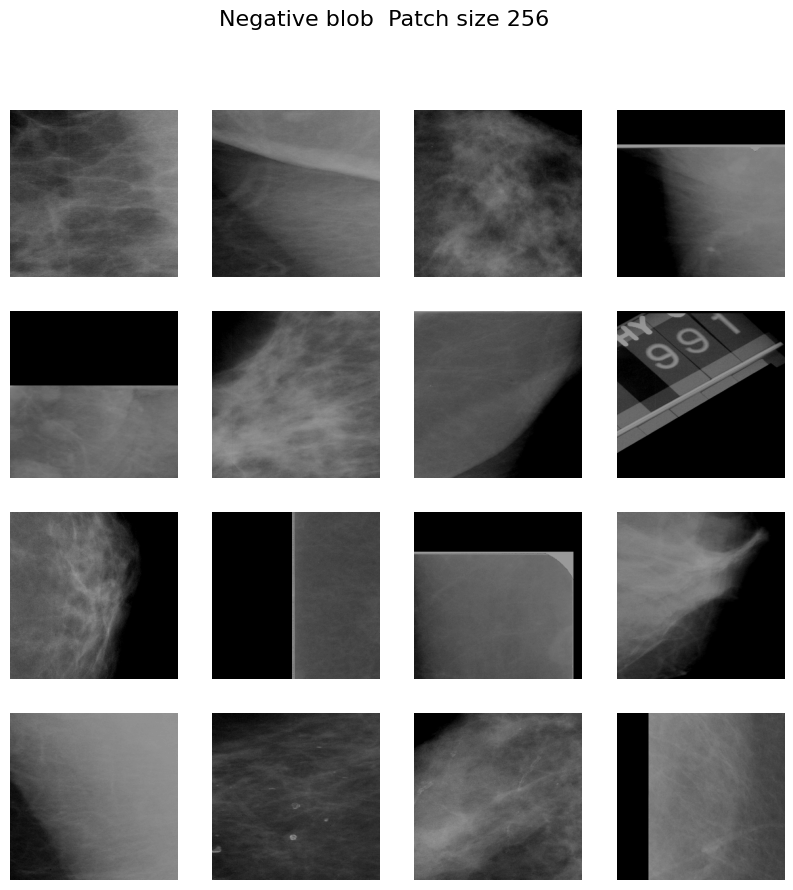

In [14]:
patch_size = 256
background = pathlib.Path(f'/tmp/eval_patches_blobneg_{patch_size}/background/')

images = list(background.glob('*img.png'))

print("Num images: ", len(images))

#sample 16 images
nrow = 4
ncol = 4
num_images = nrow * ncol

images = np.random.choice(images, num_images)
masks = [str(img).replace('_img.png', '_mask.png') for img in images]
print("Num images: ", len(images), len(masks))

fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10, 10))
ax = ax.ravel()



for i in range(num_images):
    img = np.array(Image.open(images[i]))
    mask = np.array(Image.open(masks[i]))
    assert img.shape[0] == img.shape[1] and img.shape[0] == patch_size, f"{img.shape}"
    show_mask_image(img, mask, ax[i])

fig.suptitle(f"Negative blob  Patch size {patch_size}", fontsize=16)